# Laporan Exploratory Data Analysis (EDA) Dataset Teks

## Identitas
- **Nama**  : Wayan Raditya Putra  
- **NRP**   : 5054241029  
- **Departemen** : Teknik Informatika – Artificial Intelligence Engineering  
- **Mata Kuliah** : Data Mining  
- **Tugas** : Praktikum Exploratory Data Analysis (EDA) Dataset Teks  
- **Dosen Pengampu** :  
   - **Dini Adni Navastara, S.Kom., M.Sc.**, Dosen Informatika ITS  
   - **Ilham Gurat Adillion, S.Kom., M.Kom.**, Dosen Informatika ITS  



## Pendahuluan

Exploratory Data Analysis (EDA) merupakan tahap awal dalam proses analisis data
yang bertujuan untuk memahami struktur, pola, serta karakteristik dari dataset
sebelum dilakukan pemodelan lebih lanjut. Melalui EDA, kita dapat mendeteksi
distribusi data, ketidakseimbangan kelas, anomali, hingga potensi insight yang
tersembunyi.

Pada praktikum ini, EDA dilakukan terhadap dataset **ulasan (review) kursus
online** yang diperoleh dari platform *Coursera* melalui Kaggle. Dataset ini
bersifat **teks**, berisi pendapat mahasiswa mengenai pengalaman belajar mereka
pada berbagai kursus, disertai rating (1–5) sebagai label numerik.

Pemilihan dataset ini didasarkan pada dua alasan utama:
1. **Relevansi pendidikan**: review mahasiswa dapat memberikan gambaran nyata
   mengenai kualitas pembelajaran, instruktur, dan materi kursus.
2. **Kekayaan data**: dengan lebih dari 140 ribu baris review, dataset ini jauh
   melebihi syarat minimal untuk kategori teks (≥1000 baris), sehingga layak
   dianalisis secara eksploratif.

Dengan demikian, laporan ini diharapkan mampu memberikan gambaran umum tentang
pola ulasan mahasiswa, perbedaan karakteristik review positif, netral, dan
negatif, serta kursus mana yang mendapat apresiasi maupun kritik terbanyak.


## Deskripsi Dataset

Dataset yang digunakan pada praktikum ini adalah **reviews_by_course.csv**,
berisi ulasan mahasiswa terhadap berbagai kursus online yang tersedia di
platform *Coursera*. Dataset ini diambil dari repositori publik di Kaggle.

### Struktur Dataset
- **Jumlah baris** : 140.320 review
- **Jumlah kolom** : 3 atribut
  - `CourseId` → kode unik kursus yang direview
  - `Review` → teks ulasan yang dituliskan mahasiswa
  - `Label` → rating numerik (1–5) yang diberikan mahasiswa

### Kategori Dataset
Berdasarkan syarat praktikum:
- **Tabular** : minimal 15 fitur dan 10.000 baris
- **Teks / Citra** : minimal 1000 data

Dataset ini termasuk kategori **teks** karena fitur utama yang dianalisis adalah
kolom `Review`. Dengan jumlah data **>140 ribu baris**, dataset ini memenuhi
syarat minimal (≥1000 baris) dan layak digunakan dalam praktikum ini.

### Relevansi Dataset
Ulasan mahasiswa merupakan representasi langsung dari pengalaman belajar. Dengan
menganalisis teks review ini, kita dapat memahami faktor-faktor yang membuat
kursus diapresiasi maupun dikritik. Informasi ini sangat relevan dalam konteks
pendidikan modern, di mana *feedback* mahasiswa menjadi salah satu dasar
peningkatan kualitas pembelajaran.


In [1]:
import pandas as pd
# Load dataset
reviews_by_course = pd.read_csv("reviews_by_course.csv")


## Load Dataset

Dataset yang digunakan adalah **reviews_by_course.csv**, berisi ulasan mahasiswa terhadap berbagai kursus online.  
Dataset ini memiliki **140.320 baris** dan **3 kolom** utama:

- `CourseId` → kode unik untuk setiap kursus  
- `Review` → teks ulasan mahasiswa  
- `Label` → rating numerik (1–5) yang diberikan mahasiswa  

Dataset ini dipilih karena masuk kategori **teks** (fokus pada analisis review), dengan jumlah data jauh melebihi syarat minimal (≥1000).  
Kolom `Label` dapat digunakan sebagai target numerik untuk eksplorasi distribusi rating, sedangkan kolom `CourseId` memungkinkan analisis per kursus.


In [2]:
# Cek bentuk data (jumlah baris, kolom)
print("Shape reviews_by_course.csv:", reviews_by_course.shape)

Shape reviews_by_course.csv: (140320, 3)


In [3]:
# Lihat beberapa sampel data
print("\nSample reviews_by_course.csv:")
display(reviews_by_course.head())


Sample reviews_by_course.csv:


,CourseId,Review,Label
0,2-speed-it,BOring,1
1,2-speed-it,Bravo !,5
2,2-speed-it,Very goo,5
3,2-speed-it,"Great course - I recommend it for all, especia...",5
4,2-speed-it,One of the most useful course on IT Management!,5


In [4]:
# Info struktur data

print("\nInfo reviews_by_course.csv:")
print(reviews_by_course.info())



Info reviews_by_course.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140320 entries, 0 to 140319
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   CourseId  140320 non-null  object
 1   Review    140317 non-null  object
 2   Label     140320 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 3.2+ MB
None


In [5]:
# Cek missing values

print("\nMissing values reviews_by_course.csv:")
print(reviews_by_course.isnull().sum())



Missing values reviews_by_course.csv:
CourseId    0
Review      3
Label       0
dtype: int64


## Data Quality Check – Missing Values

Untuk memastikan kualitas dataset, dilakukan pengecekan **missing values** pada setiap kolom:

- `CourseId` : 0 (tidak ada missing)  
- `Review` : 3 (ada 3 review kosong)  
- `Label` : 0 (tidak ada missing)  

**Insight:**  
Secara umum, dataset sangat bersih dengan jumlah missing values yang sangat kecil (hanya 3 pada kolom `Review`).  
Hal ini tidak signifikan terhadap keseluruhan data (140 ribu baris), sehingga dapat diatasi dengan menghapus baris kosong tersebut tanpa memengaruhi hasil analisis.


Distribusi Label (reviews_by_course.csv):
Label
1      2867
2      2554
3      5923
4     22460
5    106516
Name: count, dtype: int64


C:\Users\radit\AppData\Local\Temp\ipykernel_23240\645876695.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts_course.index, y=label_counts_course.values, palette="mako")


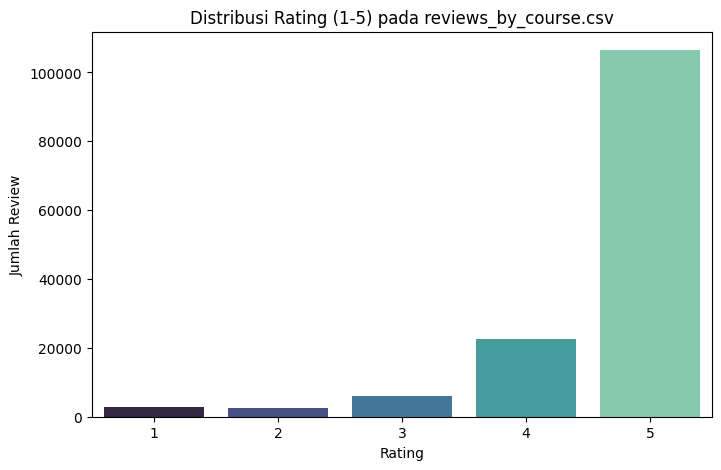

In [6]:
# Hitung distribusi label (rating)
import matplotlib.pyplot as plt
import seaborn as sns

label_counts_course = reviews_by_course['Label'].value_counts().sort_index()

print("Distribusi Label (reviews_by_course.csv):")
print(label_counts_course)


# Visualisasi distribusi label
plt.figure(figsize=(8,5))
sns.barplot(x=label_counts_course.index, y=label_counts_course.values, palette="mako")
plt.title("Distribusi Rating (1-5) pada reviews_by_course.csv")
plt.xlabel("Rating")
plt.ylabel("Jumlah Review")
plt.show()

## Distribusi Rating

Analisis distribusi rating (`Label`) menunjukkan:

- Rating **5** mendominasi dengan **106.516 review**.  
- Rating **4** berjumlah **22.460 review**.  
- Rating **3** (netral) berjumlah **5.923 review**.  
- Rating rendah: **2.554 review** untuk rating 2, dan **2.867 review** untuk rating 1.  

**Insight:**
- Dataset ini sangat **imbalanced** → mayoritas review bernada positif (rating 4–5 menyumbang lebih dari 90%).  
- Rating rendah (1–2) hanya sebagian kecil, sehingga informasi negatif relatif jarang.  
- Hal ini penting untuk dicatat karena analisis teks (wordcloud) pada review negatif bisa memberikan insight unik yang tidak terlihat dari angka rata-rata.


Statistik Panjang Review (karakter) - reviews_by_course:
count    140320.000000
mean        128.750634
std         177.402160
min           1.000000
25%          31.000000
50%          76.000000
75%         160.000000
max        7766.000000
Name: review_length_char, dtype: float64

Statistik Panjang Review (kata) - reviews_by_course:
count    140320.000000
mean         21.541085
std          30.317223
min           1.000000
25%           5.000000
50%          12.000000
75%          27.000000
max        1338.000000
Name: review_length_word, dtype: float64


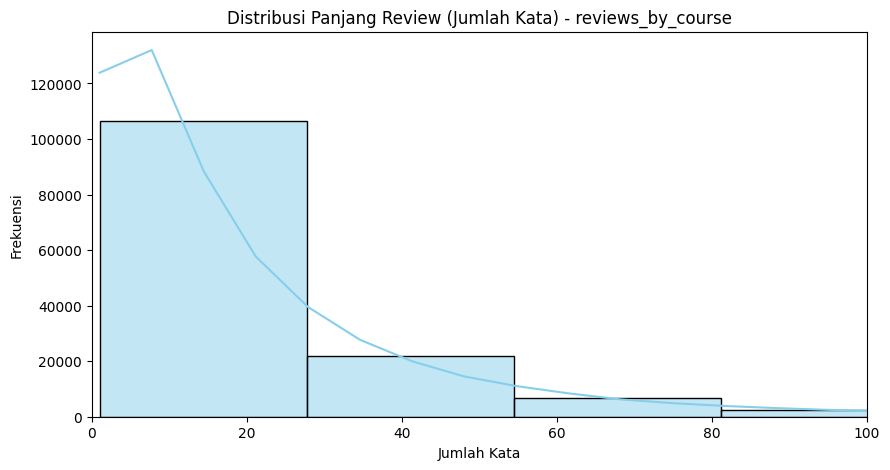

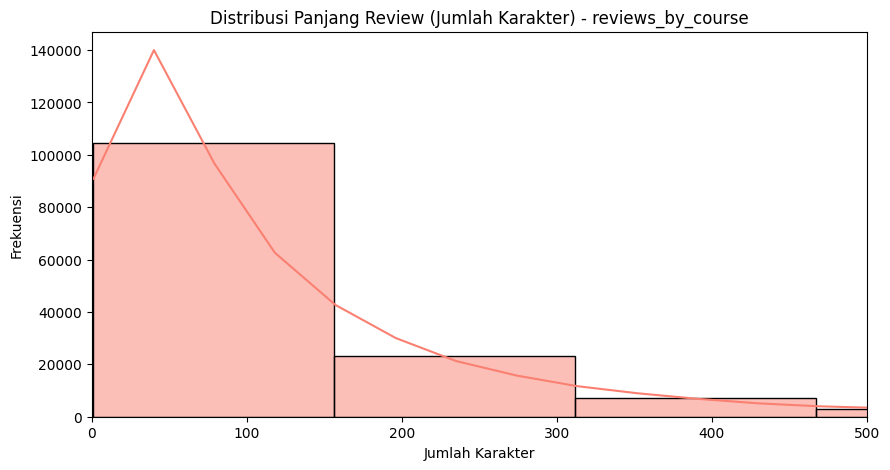

In [7]:
# Tambahkan kolom baru: jumlah karakter & jumlah kata
reviews_by_course['review_length_char'] = reviews_by_course['Review'].astype(str).apply(len)
reviews_by_course['review_length_word'] = reviews_by_course['Review'].astype(str).apply(lambda x: len(x.split()))

# Statistik deskriptif panjang review
print("Statistik Panjang Review (karakter) - reviews_by_course:")
print(reviews_by_course['review_length_char'].describe())
print("\nStatistik Panjang Review (kata) - reviews_by_course:")
print(reviews_by_course['review_length_word'].describe())

# Histogram distribusi jumlah kata
plt.figure(figsize=(10,5))
sns.histplot(reviews_by_course['review_length_word'], bins=50, kde=True, color="skyblue")
plt.title("Distribusi Panjang Review (Jumlah Kata) - reviews_by_course")
plt.xlabel("Jumlah Kata")
plt.ylabel("Frekuensi")
plt.xlim(0, 100)  # batasi x-axis agar fokus (karena ada outlier review sangat panjang)
plt.show()

# Histogram distribusi jumlah karakter
plt.figure(figsize=(10,5))
sns.histplot(reviews_by_course['review_length_char'], bins=50, kde=True, color="salmon")
plt.title("Distribusi Panjang Review (Jumlah Karakter) - reviews_by_course")
plt.xlabel("Jumlah Karakter")
plt.ylabel("Frekuensi")
plt.xlim(0, 500)  # batasi x-axis agar fokus (karena ada outlier sangat panjang)
plt.show()

## Panjang Review

Dilakukan analisis panjang review berdasarkan jumlah **karakter** dan **kata**:

- **Karakter**
  - Rata-rata panjang review: **128 karakter**  
  - Review terpendek: 1 karakter  
  - Review terpanjang: 7.766 karakter  
  - Mayoritas review berada pada rentang **31–160 karakter** (Q1–Q3)

- **Kata**
  - Rata-rata panjang review: **21 kata**  
  - Review terpendek: 1 kata  
  - Review terpanjang: 1.338 kata  
  - Mayoritas review berada pada rentang **5–27 kata** (Q1–Q3)

**Insight:**
- Sebagian besar review relatif **singkat** (1–2 kalimat), namun ada outlier berupa review yang sangat panjang.  
- Review pendek cenderung hanya menyampaikan kesan umum (“Good!”, “Boring”), sedangkan review panjang biasanya berisi penjelasan detail.  
- Perbedaan ini menarik untuk analisis lanjutan, karena review panjang berpotensi memberi insight yang lebih kaya.


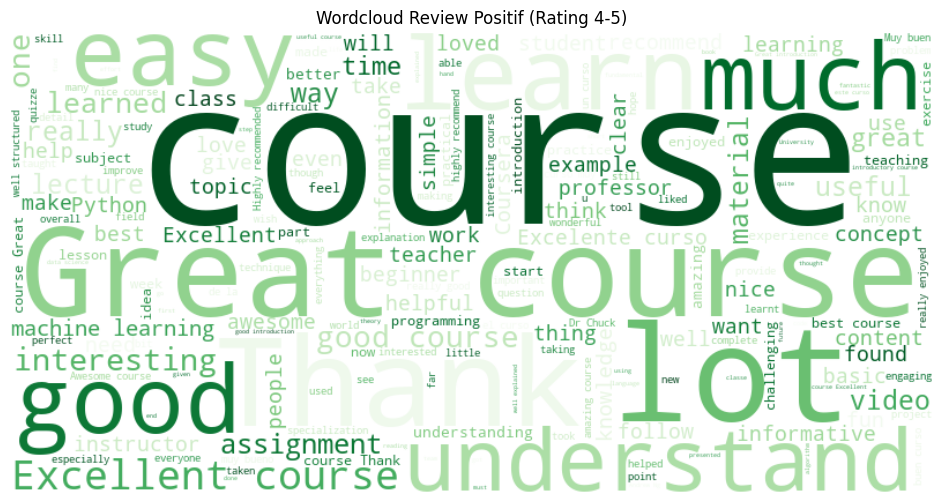

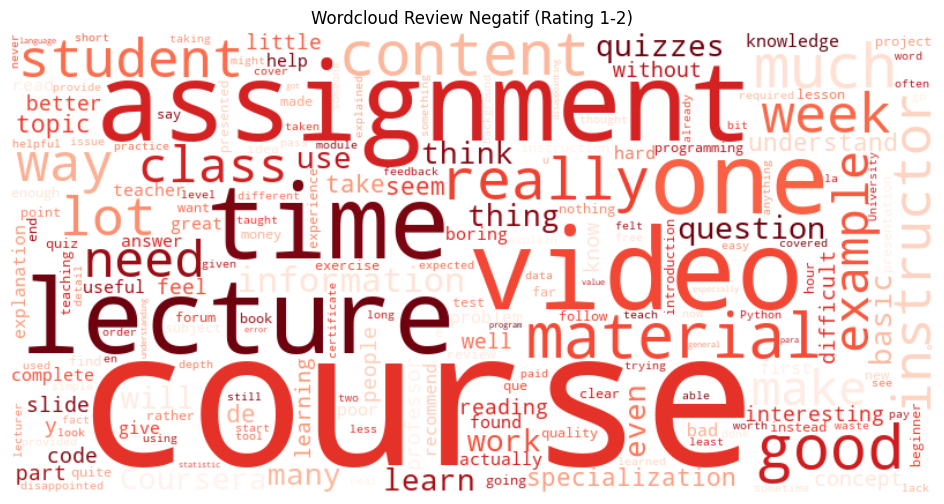

In [8]:
from wordcloud import WordCloud, STOPWORDS

# Pisahkan review positif (rating 4-5) dan negatif (rating 1-2)
positive_reviews = reviews_by_course[reviews_by_course['Label'] >= 4]['Review']
negative_reviews = reviews_by_course[reviews_by_course['Label'] <= 2]['Review']

# Gabungkan jadi satu teks panjang
text_positive = " ".join(positive_reviews.astype(str))
text_negative = " ".join(negative_reviews.astype(str))

# Stopwords (kata umum yang diabaikan)
stopwords = set(STOPWORDS)

# Wordcloud positif
wordcloud_pos = WordCloud(width=800, height=400, background_color="white", stopwords=stopwords, colormap="Greens").generate(text_positive)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud_pos, interpolation="bilinear")
plt.axis("off")
plt.title("Wordcloud Review Positif (Rating 4-5)")
plt.show()

# Wordcloud negatif
wordcloud_neg = WordCloud(width=800, height=400, background_color="white", stopwords=stopwords, colormap="Reds").generate(text_negative)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud_neg, interpolation="bilinear")
plt.axis("off")
plt.title("Wordcloud Review Negatif (Rating 1-2)")
plt.show()

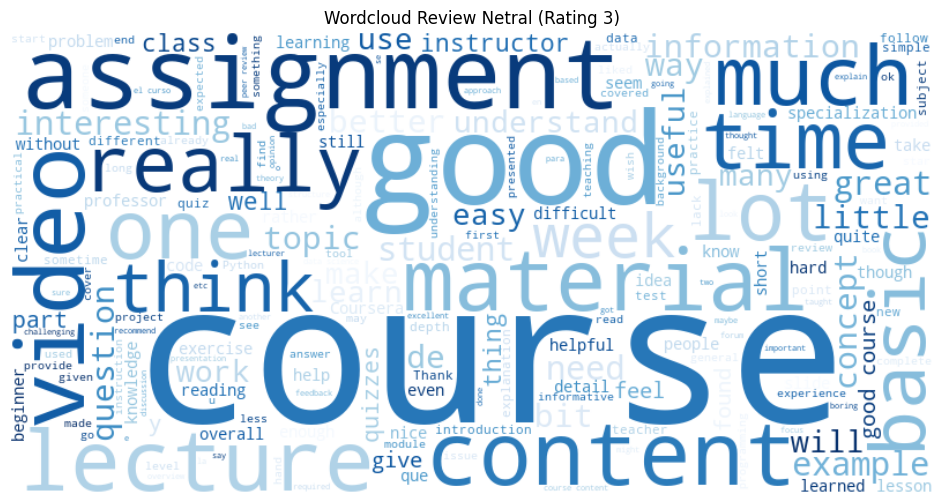

In [9]:
# Wordcloud Review Netral (Rating 3)

# Pisahkan review netral (rating 3)
neutral_reviews = reviews_by_course[reviews_by_course['Label'] == 3]['Review']

# Gabungkan jadi satu teks panjang
text_neutral = " ".join(neutral_reviews.astype(str))

# Wordcloud netral
wordcloud_neu = WordCloud(width=800, height=400, background_color="white", stopwords=stopwords, colormap="Blues").generate(text_neutral)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud_neu, interpolation="bilinear")
plt.axis("off")
plt.title("Wordcloud Review Netral (Rating 3)")
plt.show()

## Analisis Wordcloud Review

### Review Negatif (Rating 1–2)
- Kata dominan: **course, assignment, lecture, material, content, video**.  
- Kata bernuansa keluhan: *boring*, *difficult*, *poor*, *basic*.  
- **Insight:** Keluhan utama berkisar pada kualitas materi yang terlalu sederhana, tugas yang membingungkan, serta penyampaian video/lecture yang dinilai membosankan.

### Review Positif (Rating 4–5)
- Kata dominan: **thank, learn, lot, easy, good, understand, great, excellent**.  
- Banyak ekspresi kepuasan: *helpful*, *interesting*, *love*, *useful*, *clear*.  
- **Insight:** Review positif menyoroti pengalaman belajar yang bermanfaat, instruktur yang jelas, dan rasa terima kasih mahasiswa. Kata *thank* yang paling besar menunjukkan kepuasan umum.

### Review Netral (Rating 3)
- Kata dominan: **course, content, video, assignment, material, good**.  
- Tidak banyak kata emosional (positif/negatif), lebih banyak deskriptif seperti *week, example, concept, quizzes, time*.  
- **Insight:** Review netral berfokus pada aspek konten kursus secara objektif, tanpa banyak muatan emosi. Mahasiswa yang memberi rating 3 cenderung menganggap kursus “cukup baik” namun masih ada ruang perbaikan.

**Kesimpulan Umum:**
- Review **positif** didominasi kata apresiasi dan rasa terima kasih.  
- Review **negatif** menyoroti materi yang membosankan atau terlalu sederhana.  
- Review **netral** cenderung deskriptif tanpa emosi kuat.  

Hal ini menunjukkan bahwa meskipun mayoritas ulasan bernada positif, ulasan negatif dan netral memberikan **feedback kritis** yang penting bagi perbaikan kualitas kursus.


In [10]:
#  Course dengan review positif terbanyak
positive_counts = (reviews_by_course[reviews_by_course['Label'] >= 4]
                   .groupby('CourseId')['Review']
                   .count()
                   .sort_values(ascending=False)
                   .head(10))

print("Top 10 Course dengan Review Positif Terbanyak:")
print(positive_counts)


Top 10 Course dengan Review Positif Terbanyak:
CourseId
machine-learning                          8478
learning-how-to-learn                     6986
python                                    5710
python-data                               2319
python-network-data                       1777
html-css-javascript                       1473
data-scientists-tools                     1339
grammar-punctuation                       1203
ml-foundations                            1118
html-css-javascript-for-web-developers    1105
Name: Review, dtype: int64


In [11]:
#  Course dengan review negatif terbanyak
negative_counts = (reviews_by_course[reviews_by_course['Label'] <= 2]
                   .groupby('CourseId')['Review']
                   .count()
                   .sort_values(ascending=False)
                   .head(10))

print("Top 10 Course dengan Review Negatif Terbanyak:")
print(negative_counts)


Top 10 Course dengan Review Negatif Terbanyak:
CourseId
r-programming              134
data-scientists-tools      113
analytics-excel            104
swift-programming           91
statistical-inference       66
python                      65
work-smarter-not-harder     64
duke-programming-web        59
ml-foundations              59
cyber-security-domain       54
Name: Review, dtype: int64


## Analisis Kursus dengan Review Positif & Negatif Terbanyak

### Top 10 Kursus dengan Review Positif Terbanyak
1. **machine-learning** – 8.478 review positif  
2. **learning-how-to-learn** – 6.986 review positif  
3. **python** – 5.710 review positif  
4. **python-data** – 2.319 review positif  
5. **python-network-data** – 1.777 review positif  
6. **html-css-javascript** – 1.473 review positif  
7. **data-scientists-tools** – 1.339 review positif  
8. **grammar-punctuation** – 1.203 review positif  
9. **ml-foundations** – 1.118 review positif  
10. **html-css-javascript-for-web-developers** – 1.105 review positif  

 **Insight:** Kursus yang berhubungan dengan *machine learning* dan *pemrograman dasar* mendominasi ulasan positif. Hal ini menunjukkan topik-topik tersebut memiliki permintaan tinggi dan diapresiasi luas oleh mahasiswa.



### Top 10 Kursus dengan Review Negatif Terbanyak
1. **r-programming** – 134 review negatif  
2. **data-scientists-tools** – 113 review negatif  
3. **analytics-excel** – 104 review negatif  
4. **swift-programming** – 91 review negatif  
5. **statistical-inference** – 66 review negatif  
6. **python** – 65 review negatif  
7. **work-smarter-not-harder** – 64 review negatif  
8. **duke-programming-web** – 59 review negatif  
9. **ml-foundations** – 59 review negatif  
10. **cyber-security-domain** – 54 review negatif  

**Insight:** Beberapa kursus populer tetap muncul di daftar review negatif, seperti **python** dan **ml-foundations**, meskipun juga termasuk kursus dengan review positif terbanyak. Ini menunjukkan bahwa kursus populer tidak selalu sempurna; semakin banyak peserta, semakin tinggi kemungkinan munculnya kritik.



### Kesimpulan
- Kursus bertema *machine learning* dan *pemrograman dasar* adalah yang paling banyak diapresiasi.  
- Namun, kursus yang populer juga lebih sering mendapat sorotan negatif, menandakan adanya **gap kualitas** atau ekspektasi yang tidak sepenuhnya terpenuhi.  
- Analisis ini menegaskan pentingnya membaca **review negatif** meski secara angka kursus terlihat sangat populer.


## Analisis dan Kesimpulan Akhir
Hasil eksplorasi data menunjukkan pola menarik:

1. **Mayoritas review bernada positif**  
   Rating 4–5 mendominasi lebih dari 90% ulasan. Wordcloud positif didominasi
   kata-kata seperti *thank*, *learn*, *great*, *easy*, yang mencerminkan
   apresiasi mahasiswa terhadap kursus.

2. **Review negatif memberi sinyal masalah spesifik**  
   Walaupun jumlahnya sedikit, review dengan rating 1–2 menyoroti isu penting,
   seperti materi yang *boring*, *difficult*, atau tugas yang membingungkan.
   Kata-kata seperti *assignment*, *content*, dan *video* banyak muncul dalam
   wordcloud negatif.

3. **Kursus populer ≠ sempurna**  
   Analisis per kursus menunjukkan kursus dengan review positif terbanyak
   adalah **machine-learning** (8.478 ulasan positif) dan **learning-how-to-learn**
   (6.986 ulasan positif). Namun, kursus populer seperti **python** dan
   **ml-foundations** juga muncul dalam daftar kursus dengan review negatif
   terbanyak. Hal ini menunjukkan bahwa semakin populer kursus, semakin tinggi
   kemungkinan munculnya kritik.


Data ini menggambarkan fenomena dunia nyata: kursus online yang populer memang
mampu menarik banyak apresiasi, tetapi popularitas juga berarti ekspektasi
mahasiswa lebih tinggi. Kritik pada kursus populer menjadi bahan evaluasi
berharga agar kualitas pembelajaran terus ditingkatkan. Dengan kata lain,
angka rating tinggi belum tentu berarti “sempurna” tanpa memperhatikan suara
mahasiswa dalam review.



Berdasarkan hasil EDA, diperoleh beberapa poin penting:

- Dataset **reviews_by_course.csv** termasuk kategori teks dengan lebih dari
  140 ribu ulasan, sehingga memenuhi syarat praktikum.  
- Distribusi rating sangat **imbalanced**: mayoritas ulasan bernada positif
  (rating 4–5), sedangkan ulasan negatif jumlahnya sedikit.  
- Analisis panjang review menunjukkan mayoritas ulasan singkat, namun review
  panjang berisi insight lebih detail.  
- Wordcloud membantu mengidentifikasi kata dominan:  
  - Positif: *thank, learn, great, easy*  
  - Negatif: *boring, difficult, assignment, content*  
  - Netral: *course, video, material, quizzes*  
- Analisis per kursus menegaskan bahwa kursus populer mendapat apresiasi besar,
  namun juga tidak lepas dari kritik.  

**EDA teks terbukti singkat namun powerful**:  
meskipun hanya ada satu fitur utama (teks review), analisis mampu memberikan
cerita yang kaya mengenai pengalaman mahasiswa dalam pembelajaran online.
